In [149]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
import hvplot.pandas
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [150]:
import yfinance as yf


In [151]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Adj Close"]
    return dataclose_df

In [152]:
defport = read_data(['GROW.AX', 'DHOF.AX', 'IHCB.AX', 'VDCO.AX', 'MVA.AX', 'GOLD.AX'],"2019-04-01","2022-04-11")
shareport = read_data(['VHY.AX', 'EX20.AX', '360.AX', 'ANZ.AX', 'SQ2.AX', 'CBA.AX', 'PXA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'COL.AX', 'WES.AX', 'CSL.AX', 'RMD.AX', 'TLS.AX', 'QAN.AX', 'VCX.AX', 'ANN.AX', 'JLG.AX'],"2019-04-01","2022-04-11")
growport = read_data(['QUAL.AX',  'FEMX.AX', 'ACDC.AX', 'CLDD.AX', 'DJRE.AX'],"2019-04-01","2022-04-11")
indexport = read_data(['^AXJO','^GSPC'],"2019-04-01", "2022-04-11")
# 'MCSG.XA','MCSI.XA', include these 

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  22 of 22 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  2 of 2 completed


In [153]:
close_df = pd.concat([defport, shareport, growport, indexport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.tail()

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,DJRE.AX,FEMX.AX,QUAL.AX,^AXJO,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-04,9.58,237.720001,3.69,101.699997,24.900000,51.250000,5.65,30.400000,15.22,25.889999,...,1.880,69.750000,49.400002,86.879997,12.00,23.860001,6.19,39.049999,7513.700195,4582.640137
2022-04-05,9.58,235.960007,3.68,101.800003,24.629999,51.169998,5.80,31.299999,15.21,25.910000,...,1.865,69.919998,49.660000,86.989998,12.12,23.370001,6.17,38.919998,7527.899902,4525.120117
2022-04-06,9.58,235.929993,3.65,100.800003,24.520000,50.869999,5.49,31.410000,15.23,25.780001,...,1.865,69.779999,49.389999,84.699997,11.87,23.370001,6.02,38.580002,7490.100098,4481.149902
2022-04-07,9.59,239.350006,3.66,100.709999,24.490000,50.830002,5.12,31.799999,15.41,25.990000,...,1.845,69.500000,48.900002,83.980003,11.64,23.709999,5.97,38.459999,7442.799805,4500.209961
2022-04-08,9.59,240.649994,3.64,100.300003,24.400000,50.770000,5.15,31.930000,15.46,25.780001,...,1.835,69.980003,49.020000,84.379997,11.67,23.549999,5.95,38.799999,7478.000000,4488.279785


In [154]:
closeindex_df = (indexport)
closeindex_df.dropna(inplace = True)
closeindex_df.head()

,^AXJO,^GSPC
Date,,
2019-04-01,6217.000000,2867.189941
2019-04-02,6242.399902,2867.239990
2019-04-03,6285.000000,2873.399902
2019-04-04,6232.799805,2879.389893
2019-04-05,6181.299805,2892.739990


In [155]:
#quote_table = yf.get_quote_table([defport, shareport, growport])
#quote_table

#si.get_stats_valuation([defport, shareport, growport])

In [156]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX,360.AX,ALD.AX,AMC.AX,ANN.AX,...,VCX.AX,VHY.AX,WES.AX,ACDC.AX,CLDD.AX,DJRE.AX,FEMX.AX,QUAL.AX,^AXJO,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.001296,0.006419,-0.005277,0.003181,-0.017558,-0.003015,-0.049238,-0.023415,-0.021574,-0.018447,...,-0.023952,-0.022491,-0.022652,-0.011012,-0.021970,-0.006658,0.000000,-0.018116,-0.022690,-0.018915
2022-01-24,-0.002202,0.000713,-0.007958,0.000839,0.012053,-0.001512,-0.088779,-0.007659,0.003576,0.003334,...,0.024540,-0.007875,-0.001319,-0.011870,-0.013943,0.005865,-0.005650,-0.000984,-0.005059,0.002772
2022-01-25,0.001834,0.008554,0.000000,-0.001771,-0.037372,-0.005868,0.031123,-0.026510,-0.013658,-0.028701,...,-0.035928,-0.024903,-0.008491,-0.031147,-0.002357,-0.011662,-0.009943,-0.012066,-0.024918,-0.012172
2022-01-27,-0.002012,-0.007192,-0.002674,-0.010456,-0.026024,-0.007045,-0.068241,0.003447,-0.016255,-0.028927,...,-0.015528,-0.006385,-0.036917,-0.018653,-0.040945,-0.007164,-0.024390,-0.014207,-0.017711,-0.006873
2022-01-28,0.000000,-0.001591,-0.002681,0.004528,0.022339,0.006903,0.076056,-0.005496,0.028764,0.000641,...,0.012618,0.023775,0.042087,0.010733,0.017241,0.008913,0.014706,0.021997,0.021906,0.024348
2022-01-31,0.000000,-0.003733,0.013441,-0.004508,0.013710,0.001143,0.073298,0.026943,0.000595,-0.143406,...,0.015576,-0.007532,-0.000569,0.010841,0.035512,0.024821,0.010145,0.023998,-0.002361,0.018886
2022-02-01,-0.006048,-0.001726,0.000000,0.002830,0.005072,0.003424,0.042683,0.010763,0.008323,-0.003363,...,0.003068,0.004427,0.001708,0.014226,0.040530,0.000411,0.014347,0.007973,0.004934,0.006863
2022-02-02,0.000000,-0.009995,0.002653,0.000847,0.005467,0.002085,0.011696,0.014975,-0.035377,-0.026247,...,0.006116,0.014009,0.015909,0.010466,0.013483,-0.010669,0.001414,0.011026,0.011661,0.009423


In [157]:
dailyreturn_std = datareturns_df.std() 
dailyreturn_std

DHOF.AX    0.003067
GOLD.AX    0.012991
GROW.AX    0.005431
IHCB.AX    0.004968
MVA.AX     0.012684
VDCO.AX    0.003820
360.AX     0.070238
ALD.AX     0.017879
AMC.AX     0.014225
ANN.AX     0.024093
ANZ.AX     0.014096
APA.AX     0.012818
BHP.AX     0.020436
BXB.AX     0.014898
CBA.AX     0.014071
CHC.AX     0.021093
COL.AX     0.014555
CSL.AX     0.020445
EX20.AX    0.010748
JLG.AX     0.025538
PXA.AX     0.029253
QAN.AX     0.025002
RMD.AX     0.019133
SQ2.AX     0.075846
TLS.AX     0.012676
VCX.AX     0.020128
VHY.AX     0.009322
WES.AX     0.016992
ACDC.AX    0.018032
CLDD.AX    0.026760
DJRE.AX    0.010521
FEMX.AX    0.015741
QUAL.AX    0.014744
^AXJO      0.009899
^GSPC      0.013932
dtype: float64

In [158]:
#get daily returns on defensive portfolio 
defreturns_df = defport.pct_change().copy() 
defreturns_df.head()

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX
Date,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.000421,0.009048,-0.007895,0.000371,-0.016810,-0.000934
2022-01-12,0.000241,0.001623,0.000000,0.001114,-0.003579,0.002430
2022-01-13,-0.001382,-0.005286,0.010610,-0.001483,-0.003591,-0.000559
2022-01-14,0.000632,0.000943,-0.002625,0.002042,-0.005206,-0.001679


In [159]:
defport_std = defreturns_df.std() 
defport_std

DHOF.AX    0.002855
GOLD.AX    0.012164
GROW.AX    0.005464
IHCB.AX    0.004698
MVA.AX     0.012088
VDCO.AX    0.003611
dtype: float64

In [160]:
# Calculate the annualized standard deviation (252 trading days)
annualdef_std = defport_std * np.sqrt(252)
annualdef_std

DHOF.AX    0.045325
GOLD.AX    0.193102
GROW.AX    0.086738
IHCB.AX    0.074583
MVA.AX     0.191891
VDCO.AX    0.057330
dtype: float64

In [161]:
#look at correlations for defensive holdings first 
defportcorr = defreturns_df.corr()
defportcorr

,DHOF.AX,GOLD.AX,GROW.AX,IHCB.AX,MVA.AX,VDCO.AX
DHOF.AX,1.000000,-0.245784,-0.154779,0.098316,-0.097438,0.021229
GOLD.AX,-0.245784,1.000000,-0.226657,0.086354,-0.394344,-0.358731
GROW.AX,-0.154779,-0.226657,1.000000,0.138302,0.234312,0.350580
IHCB.AX,0.098316,0.086354,0.138302,1.000000,0.139093,0.559463
MVA.AX,-0.097438,-0.394344,0.234312,0.139093,1.000000,0.604825
VDCO.AX,0.021229,-0.358731,0.350580,0.559463,0.604825,1.000000


<AxesSubplot:>

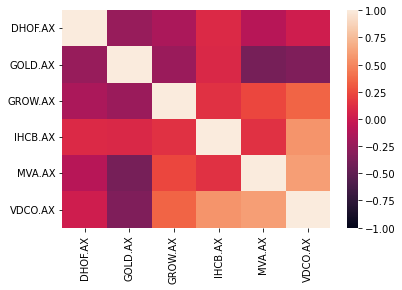

In [162]:
sns.heatmap(defportcorr, vmin=-1, vmax=1)

In [163]:
# Calculate sharpe ratios of defensive portfolio
sharpe_ratios = (datareturns_df.mean() * 252) / (dailyreturn_std * np.sqrt(252))
sharpe_ratios

DHOF.AX   -3.570728
GOLD.AX    0.466310
GROW.AX   -2.142548
IHCB.AX   -3.719285
MVA.AX     0.013836
VDCO.AX   -3.378719
360.AX    -1.526145
ALD.AX     0.980711
AMC.AX    -1.819852
ANN.AX    -2.872458
ANZ.AX    -0.692593
APA.AX     1.888440
BHP.AX     1.928814
BXB.AX    -0.152719
CBA.AX     1.867882
CHC.AX    -0.895156
COL.AX     2.744123
CSL.AX    -0.060295
EX20.AX    0.057808
JLG.AX     1.089267
PXA.AX    -0.446483
QAN.AX     0.195778
RMD.AX     0.192059
SQ2.AX     0.370190
TLS.AX    -0.579030
VCX.AX     1.896065
VHY.AX     1.801060
WES.AX    -1.356285
ACDC.AX   -2.002833
CLDD.AX   -1.142258
DJRE.AX   -0.481656
FEMX.AX   -3.119559
QUAL.AX   -1.177153
^AXJO      0.621108
^GSPC      0.134637
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

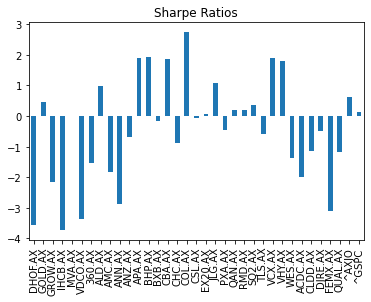

In [164]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [165]:
sharereturns_df = shareport.pct_change().copy() 
sharereturns_df.head()

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,EX20.AX,JLG.AX,PXA.AX,QAN.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21,-0.049238,-0.023415,-0.021574,-0.018447,-0.016445,-0.024316,-0.048115,-0.012770,-0.012575,-0.006257,...,-0.023245,0.000000,-0.025091,-0.029762,-0.017086,-0.023382,-0.014458,-0.023952,-0.022491,-0.022652
2022-01-24,-0.088779,-0.007659,0.003576,0.003334,-0.012095,-0.006231,-0.002188,-0.000995,0.000719,0.012021,...,-0.005949,-0.015476,0.006971,-0.014315,-0.001830,-0.036232,-0.009780,0.024540,-0.007875,-0.001319
2022-01-25,0.031123,-0.026510,-0.013658,-0.028701,-0.036010,-0.013584,-0.012500,-0.025896,-0.020423,-0.062217,...,-0.031421,-0.032648,-0.020234,-0.033195,-0.002139,-0.042105,-0.029630,-0.035928,-0.024903,-0.008491
2022-01-27,-0.068241,0.003447,-0.016255,-0.028927,0.011207,0.016949,0.014213,-0.015337,-0.017496,-0.025332,...,-0.024202,-0.062500,-0.024456,-0.023605,-0.038579,-0.053501,-0.012723,-0.015528,-0.006385,-0.036917


In [166]:
shareport_std = sharereturns_df.std() 
shareport_std

360.AX     0.068806
ALD.AX     0.017431
AMC.AX     0.014104
ANN.AX     0.023825
ANZ.AX     0.013975
APA.AX     0.012780
BHP.AX     0.020296
BXB.AX     0.014880
CBA.AX     0.014037
CHC.AX     0.021114
COL.AX     0.013930
CSL.AX     0.020347
EX20.AX    0.010636
JLG.AX     0.025238
PXA.AX     0.028912
QAN.AX     0.024769
RMD.AX     0.018948
SQ2.AX     0.074491
TLS.AX     0.012786
VCX.AX     0.020147
VHY.AX     0.009295
WES.AX     0.016762
dtype: float64

In [167]:
# Calculate the annualized standard deviation (252 trading days)
annualshare_std = shareport_std * np.sqrt(252)
annualshare_std

360.AX     1.092267
ALD.AX     0.276704
AMC.AX     0.223897
ANN.AX     0.378209
ANZ.AX     0.221841
APA.AX     0.202877
BHP.AX     0.322182
BXB.AX     0.236218
CBA.AX     0.222825
CHC.AX     0.335170
COL.AX     0.221126
CSL.AX     0.322993
EX20.AX    0.168847
JLG.AX     0.400641
PXA.AX     0.458969
QAN.AX     0.393200
RMD.AX     0.300791
SQ2.AX     1.182504
TLS.AX     0.202965
VCX.AX     0.319827
VHY.AX     0.147550
WES.AX     0.266092
dtype: float64

In [168]:
shareportcorr = sharereturns_df.corr() 
shareportcorr

,360.AX,ALD.AX,AMC.AX,ANN.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,...,EX20.AX,JLG.AX,PXA.AX,QAN.AX,RMD.AX,SQ2.AX,TLS.AX,VCX.AX,VHY.AX,WES.AX
360.AX,1.000000,0.104009,0.144604,0.043666,0.216273,0.047183,-0.027217,0.184403,0.340163,0.479818,...,0.603779,0.338551,0.381366,0.558781,0.367202,0.740410,0.312898,0.304223,0.399741,0.466860
ALD.AX,0.104009,1.000000,0.103109,-0.078453,0.231310,-0.044348,0.236133,0.054906,0.286110,0.186394,...,0.411954,0.257505,0.404278,0.286153,0.245224,0.187958,0.281935,0.036522,0.445723,0.136434
AMC.AX,0.144604,0.103109,1.000000,0.256525,0.377924,0.301316,-0.134611,0.321440,0.326369,0.406884,...,0.352925,0.130001,0.289071,0.303959,0.346226,0.065641,0.473587,0.279273,0.268794,0.344913
ANN.AX,0.043666,-0.078453,0.256525,1.000000,0.449903,0.254427,0.077111,0.347755,0.447157,0.166732,...,0.207642,-0.016147,0.042228,0.181560,0.142922,-0.004561,0.234141,0.210975,0.306602,0.134879
ANZ.AX,0.216273,0.231310,0.377924,0.449903,1.000000,0.471757,0.114640,0.313509,0.664398,0.290198,...,0.414686,0.125951,0.060347,0.423516,0.113809,0.033432,0.392579,0.398581,0.689257,0.312976
APA.AX,0.047183,-0.044348,0.301316,0.254427,0.471757,1.000000,0.106362,0.121554,0.229981,0.222807,...,0.212310,-0.100851,0.051570,0.145380,0.129562,-0.110998,0.256237,0.299404,0.386368,0.168906
BHP.AX,-0.027217,0.236133,-0.134611,0.077111,0.114640,0.106362,1.000000,0.202022,-0.148081,-0.032868,...,0.227469,0.160458,-0.063730,0.066998,-0.157836,-0.141759,0.114856,0.018817,0.519667,-0.048787
BXB.AX,0.184403,0.054906,0.321440,0.347755,0.313509,0.121554,0.202022,1.000000,0.330835,0.356082,...,0.398951,0.240023,0.096679,0.319272,0.006426,0.081722,0.309277,0.207332,0.367163,0.362735
CBA.AX,0.340163,0.286110,0.326369,0.447157,0.664398,0.229981,-0.148081,0.330835,1.000000,0.377189,...,0.524248,0.266794,0.169332,0.440770,0.237674,0.210605,0.379159,0.353073,0.575768,0.514402
CHC.AX,0.479818,0.186394,0.406884,0.166732,0.290198,0.222807,-0.032868,0.356082,0.377189,1.000000,...,0.711540,0.406854,0.422415,0.448918,0.313187,0.495573,0.421776,0.556518,0.422546,0.369030


<AxesSubplot:>

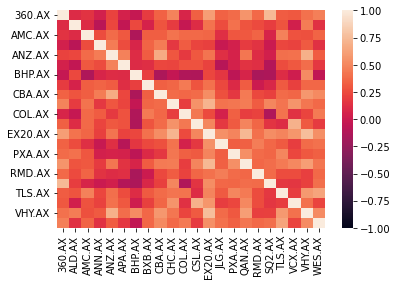

In [169]:
sns.heatmap(shareportcorr, vmin=-1, vmax=1)

In [170]:
growreturns_df = growport.pct_change().copy() 
growreturns_df.head() 

,ACDC.AX,CLDD.AX,DJRE.AX,FEMX.AX,QUAL.AX
Date,,,,,
2021-02-22,NaN,NaN,NaN,NaN,NaN
2021-02-23,-0.008809,-0.013063,0.010011,-0.017647,-0.009575
2021-02-24,-0.023175,0.002320,0.007303,-0.007485,-0.007553
2021-02-25,0.009098,0.000353,0.006214,0.001508,0.003653
2021-02-26,-0.021913,-0.030154,-0.004117,-0.007530,-0.010616


In [171]:
growport_std = growreturns_df.std() 
growport_std

ACDC.AX    0.012041
CLDD.AX    0.017769
DJRE.AX    0.008143
FEMX.AX    0.010144
QUAL.AX    0.009487
dtype: float64

In [172]:
# Calculate the annualized standard deviation (252 trading days)
annualgrow_std = growport_std * np.sqrt(252)
annualgrow_std

ACDC.AX    0.191149
CLDD.AX    0.282069
DJRE.AX    0.129268
FEMX.AX    0.161026
QUAL.AX    0.150606
dtype: float64

In [173]:
growcorrelation = growreturns_df.corr() 
growcorrelation

,ACDC.AX,CLDD.AX,DJRE.AX,FEMX.AX,QUAL.AX
ACDC.AX,1.000000,0.435175,0.363282,0.605059,0.564605
CLDD.AX,0.435175,1.000000,0.312135,0.504932,0.723486
DJRE.AX,0.363282,0.312135,1.000000,0.206946,0.556335
FEMX.AX,0.605059,0.504932,0.206946,1.000000,0.558525
QUAL.AX,0.564605,0.723486,0.556335,0.558525,1.000000


<AxesSubplot:>

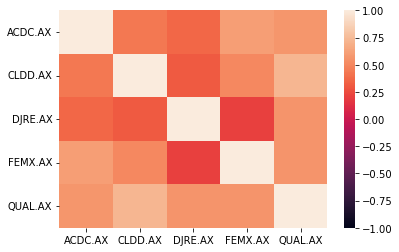

In [174]:
sns.heatmap(growcorrelation, vmin=-1, vmax=1)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabe

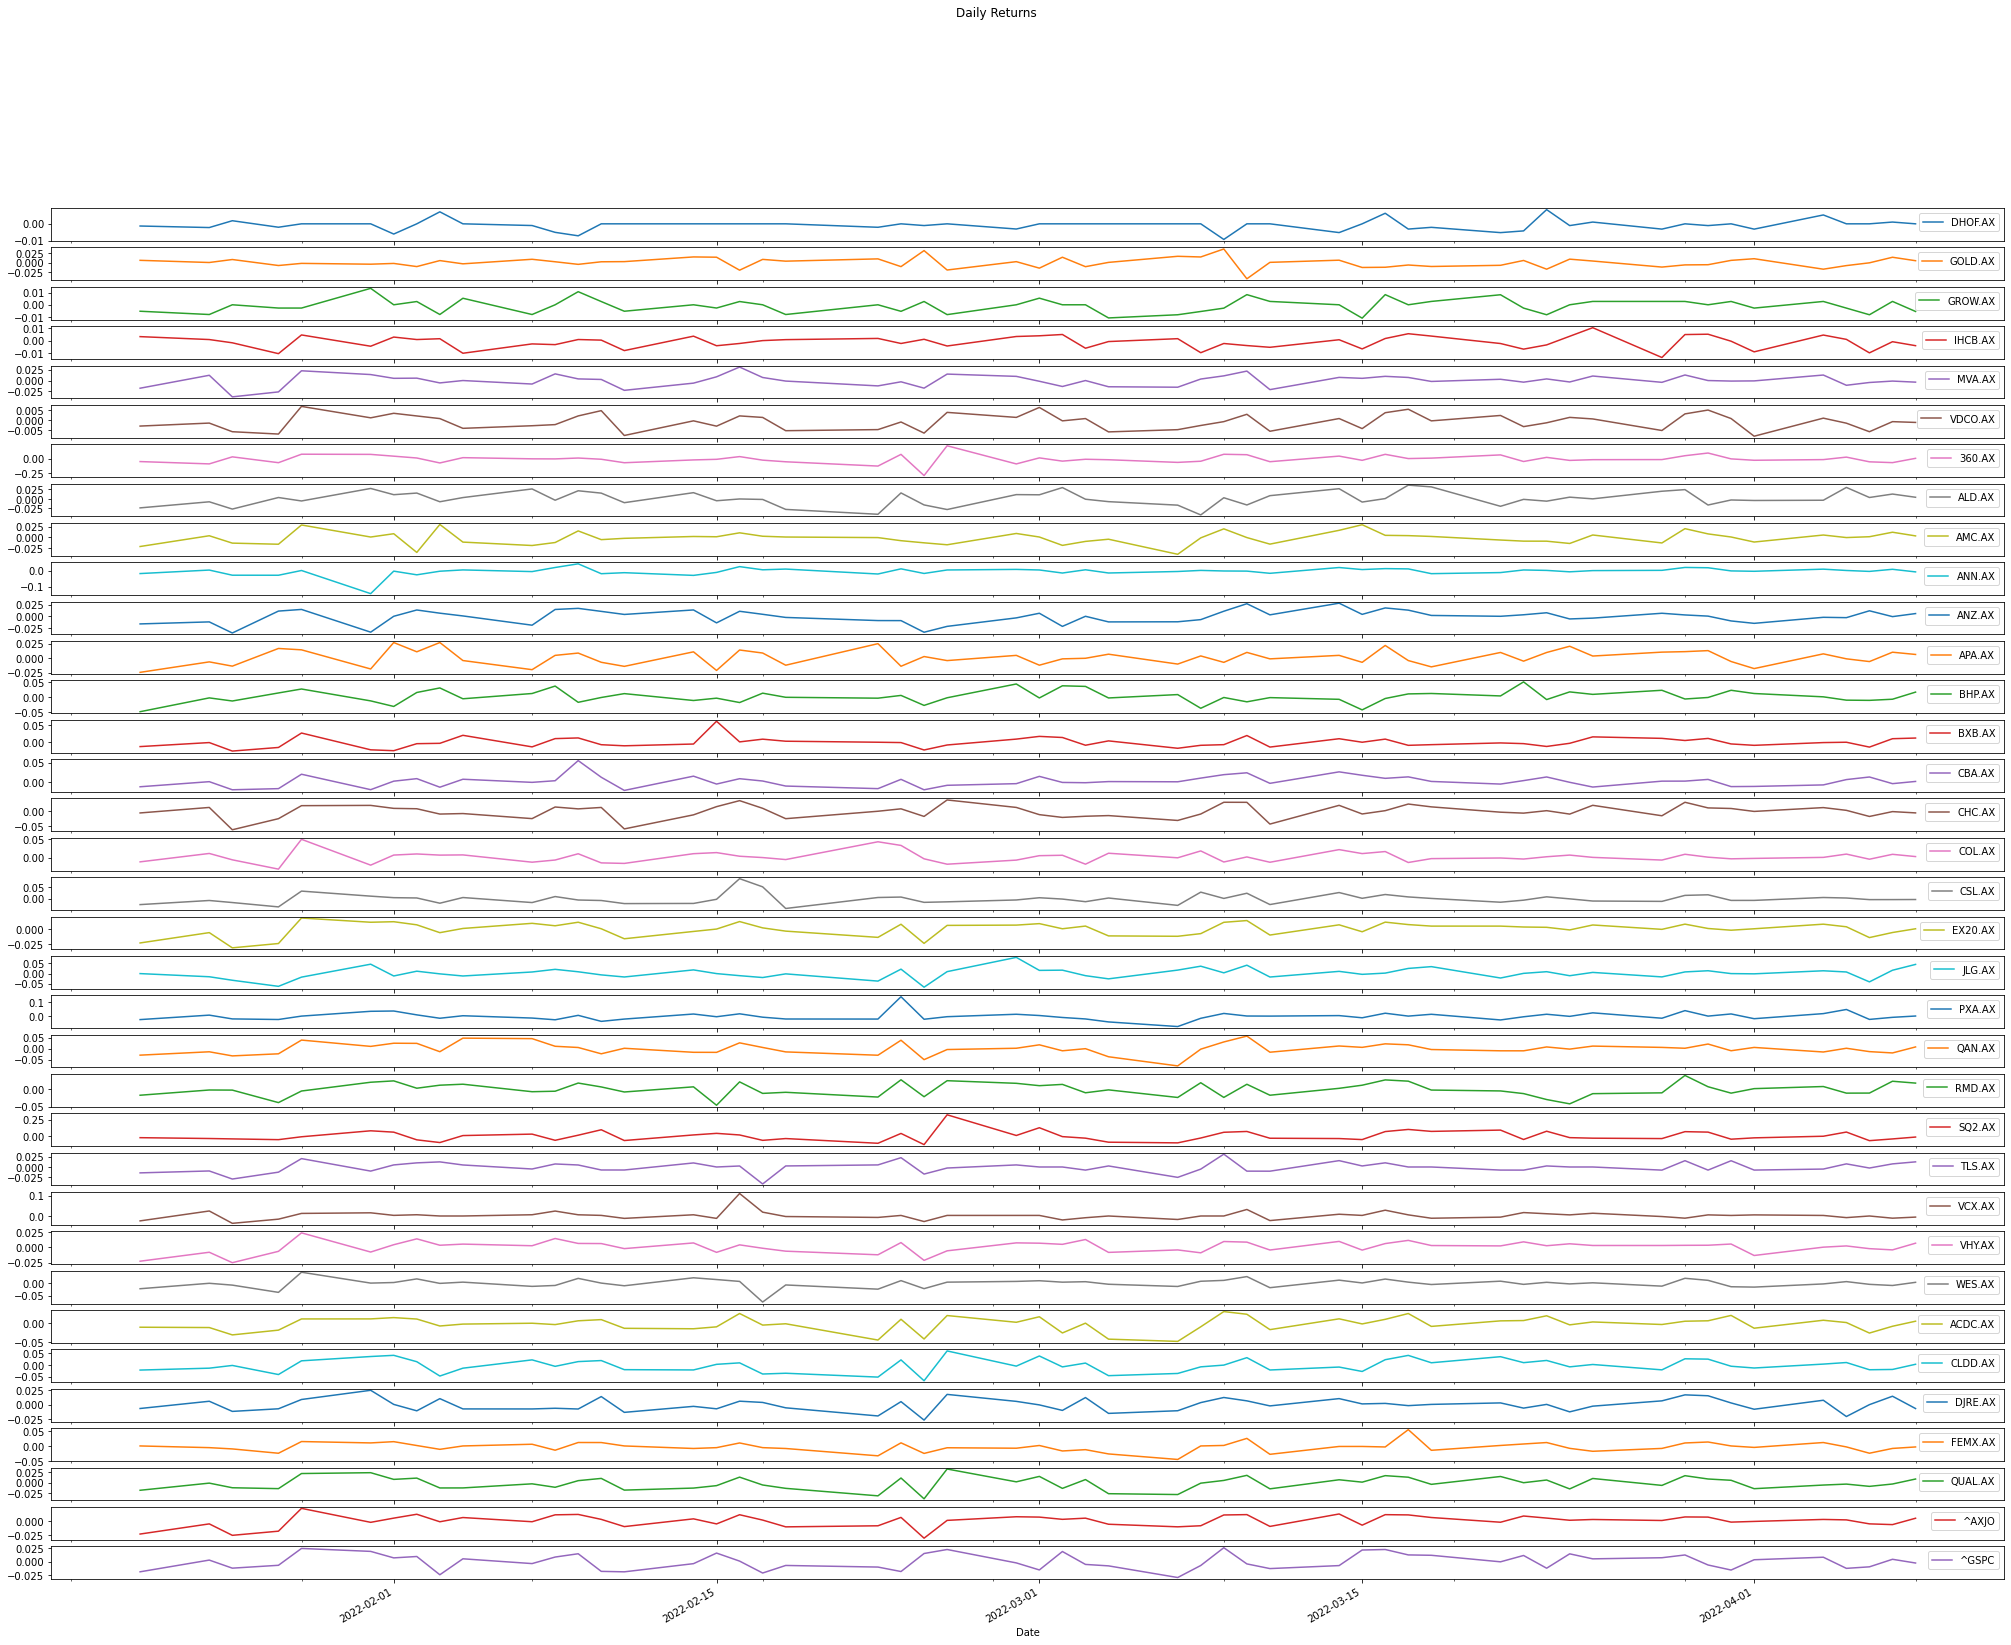

In [182]:
datareturns_df.plot(subplots=True,figsize=(35, 28), title="Daily Returns")

#graph individually,for loop graphing each column